In [132]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import optimize

In [133]:
data = pd.read_csv(r"decaytimes.csv")
data_np = data.to_numpy()

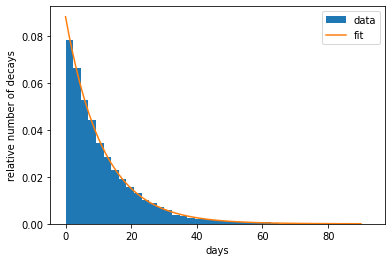

Estimation of half life:  7.84  days


In [134]:
def f(tau,t):
    f = np.log(2)/tau * np.exp(-t*np.log(2)/tau)
    return f

def fit(t):
    fit = np.log(2) * 1/len(t) * np.sum(t)
    return fit

t = np.linspace(0,90,90)

plt.figure(1)
plt.hist(data_np, bins = 40, density = True, label = 'data')
plt.plot(t, f(fit(data_np),t), label = 'fit')
plt.xlabel('days')
plt.ylabel('relative number of decays')
plt.legend()
plt.show()

print('Estimation of half life: ', np.round(fit(data_np), 2), ' days')

v =  10000  observations
half life =  7.84  days


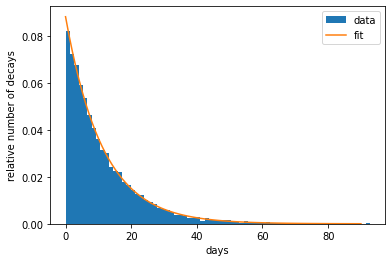

In [135]:
def f(tau,t):
    f = np.log(2)/tau * np.exp(-t*np.log(2)/tau)
    return f

def func(params): 
    v, tau = params
    t = pd.read_csv(r"decaytimes.csv").to_numpy()
    return -1* (-v + np.sum(np.log(v*f(tau, t))))

initial = np.array([10000,8])

fit = optimize.minimize(func, initial)

print('v = ', int(np.round(fit.x[0])), ' observations')
print('half life = ', np.round(fit.x[1], 2), ' days')

t = np.linspace(0,90,90)

plt.figure(1)
plt.hist(data_np, bins = 70, density = True, label = 'data')
plt.plot(t, f(fit.x[1],t), label = 'fit')
plt.xlabel('days')
plt.ylabel('relative number of decays')
plt.legend()
plt.show()

In [136]:
def f(tau,t):
    f = np.log(2)/tau * np.exp(-t*np.log(2)/tau)
    return f

def func(v, tau): 
    t = pd.read_csv(r"decaytimes.csv").to_numpy()
    return 1* (-v + np.sum(np.log(v*f(tau, t))))

v_arr = np.linspace(1,20000,50)
tau_arr = np.linspace(1,15,50)

V, Tau = np.meshgrid(v_arr,tau_arr)

Ellipse = np.zeros((50,50))
for i in range(50):
    for j in range(50):
        Ellipse[i,j] = func(V[i,j],Tau[i,j])



<ipython-input-137-8cd37888e7e4>:6: UserWarning: Legend does not support handles for QuadMesh instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


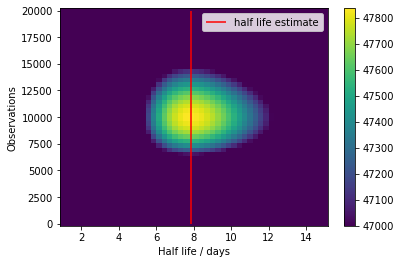

In [137]:
plt.pcolormesh(Tau, V, Ellipse, vmin = 47000, vmax = np.max(Ellipse), label = 'extended log likelihood')
plt.colorbar()
plt.xlabel('Half life / days')
plt.ylabel('Observations')
plt.vlines(fit.x[1], 0, 20000, label = 'half life estimate', color = 'red')
plt.legend()
plt.show()